In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



In [2]:
def get_explore_data():
    ''' 
    This function reads in a csv held in the same repository folder
    '''
    df = pd.read_csv('train.csv')
    return df

In [3]:
df = get_explore_data()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

* ID - ID of the patient
* A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool
* age - Age of the patient in years
* gender - Gender of the patient
* ethnicity - Ethnicity of the patient
* jaundice - Whether the patient had jaundice at the time of birth
* autism - Whether an immediate family member has been diagnosed with autism
* contry_of_res - Country of residence of the patient
* used_app_before - Whether the patient has undergone a screening test before
* result - Score for AQ1-10 screening test
* age_desc - Age of the patient
* relation - Relation of patient who completed the test
* Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

In [5]:
(df.A1_Score == 1).value_counts()

True     448
False    352
Name: A1_Score, dtype: int64

In [6]:
df.shape

(800, 22)

In [7]:
scores_only = df.copy()

In [8]:
scores_only.shape

(800, 22)

In [9]:
scores_only = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]]

In [10]:
scores_only

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,1,1,0,1,0,1,0,1,0,1,1
1,2,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,1,1,1,1,1,1,1
3,4,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,1
796,797,0,1,1,0,0,1,0,1,1,1
797,798,0,0,0,0,0,0,0,0,0,0
798,799,0,0,0,0,0,0,0,0,0,0


A1 = 448
A2 = 424
A3 = 360
A4 = 332
A5 = 316
A6 = 243
A7 = 318
A8 = 407
A9 = 396
A10 = 494 

# at this point I realize these scores are not what I thought they were and I need to revisit the source for explaination


In [11]:
df.A10_Score.sum()

494

In [12]:
df[df.ID == 1].result

0    6.351166
Name: result, dtype: float64

# what is the distribution of results?


<AxesSubplot:xlabel='result', ylabel='Count'>

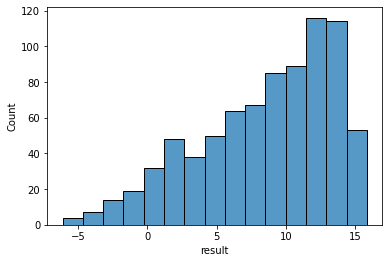

In [16]:
sns.histplot(data = df, x= "result")